<a href="https://colab.research.google.com/github/SriramKurapati/Kaggle-Titanic-Datset/blob/main/Titanic%20Datset%20Remodelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder;
from sklearn import preprocessing,tree
import seaborn as sns;
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,  f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz

In [ ]:
%matplotlib inline

In [ ]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [ ]:
training_set = training_set.drop(['Ticket'], axis=1)
test_set = test_set.drop(['Ticket'], axis=1)

In [ ]:
training_set = training_set.drop(['Cabin'], axis=1)
test_set = test_set.drop(['Cabin'], axis=1)

In [ ]:
combine = [training_set, test_set]

In [ ]:
lb = LabelEncoder();

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
for dataset in combine:
    dataset['Sex'] = lb.fit_transform(dataset['Sex'])

In [ ]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


In [ ]:
mean = training_set['Age'].mean()
std = training_set['Age'].std()

def fill_missing_val(column_val):
    if np.isnan(column_val) == True: 
        column_val = np.random.randint(std, mean, 1)[0]
    else:
         column_val = column_val
    return column_val

combine[0]['Age'] = training_set['Age'].apply(fill_missing_val) 
combine[1]['Age'] = test_set['Age'].apply(fill_missing_val) 


In [ ]:
for column in training_set.columns:
    training_set['Embarked'].fillna(training_set['Embarked'].mode()[0], inplace=True)

In [ ]:
for column in test_set.columns:
    test_set['Fare'].fillna(test_set['Fare'].mode()[0], inplace=True)

In [ ]:
def conv_fare(x):
    if x > -(0.001) and x <= 7.91:
        return 0
    elif x > 7.91 and x <= 14.4542:
        return 1
    elif x > 14.4542 and x <= 31.0:
        return 2
    elif x > 31.0 and x <= 512.3292:
        return 3
    
combine[0]['Fare'] = training_set.Fare.apply(conv_fare)
combine[1]['Fare'] = test_set.Fare.apply(conv_fare)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S


In [ ]:
training_set[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
pd.crosstab(training_set['Title'], training_set['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
training_set[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S,1


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
training_set['AgeRange'] = pd.cut(training_set['Age'], 8)
training_set[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)  

,AgeRange,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.363636
2,"(20.0, 30.0]",0.331288
3,"(30.0, 40.0]",0.445161
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [ ]:
def conv_age(x):
    if x > -(0.08) and x <= 10.0:
        return 0
    elif x > 10.0 and x <= 20.0:
        return 1
    elif x > 20.0 and x <= 30.0:
        return 2
    elif x > 30.0 and x <= 40.0:
        return 3
    elif x > 40.0 and x <= 50.0:
        return 4
    elif x > 50.0 and x <= 60.0:
        return 5
    elif x > 60.0 and x <= 70.0:
        return 6
    elif x > 70.0 and x <= 80.0:
        return 7
    
combine[0]['Age'] = training_set.Age.apply(conv_age)
combine[1]['Age'] = test_set.Age.apply(conv_age)
dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
training_set = training_set.drop(['AgeRange','Name','Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [training_set, test_set]

In [ ]:
X_train = training_set.drop(['Survived','PassengerId',], axis=1)
X_train.shape

(891, 7)

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,1,2,0,0,1,0
1,1,0,3,3,1,3,0
2,3,0,2,1,0,2,1
3,1,0,3,3,0,3,0
4,3,1,3,1,0,1,1


In [ ]:
Y_train = training_set["Survived"]
Y_train.shape

(891,)

In [ ]:
X_test  = test_set.drop(['PassengerId','Name','Parch', 'SibSp', 'FamilySize'], axis=1)
X_test.shape

(418, 7)

In [ ]:
train_new=SelectKBest(score_func=f_classif,k=7).fit(X_train,Y_train)

In [ ]:
train_new_scores = pd.DataFrame(train_new.scores_)
train_new_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([train_new_columns, train_new_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
print(feature_scores.nlargest(7,'Score')) 

  Feature_Name       Score
1          Sex  372.405724
5        Title  177.283027
0       Pclass  115.031272
3         Fare   87.509411
6      IsAlone   38.353651
4     Embarked   10.259355
2          Age    1.409483


In [ ]:
training_set.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034637,-0.022998,-0.030467,0.003878,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.039786,0.299357,0.106811,0.407753,-0.203367
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.344854,-0.634271,0.045702,-0.173929,0.135207
Sex,0.042939,-0.543351,0.131900,1.000000,0.071912,-0.243613,-0.116569,-0.502713,0.303646
Age,0.034637,-0.039786,-0.344854,0.071912,1.000000,0.116360,-0.088937,-0.049218,0.115001
Fare,-0.022998,0.299357,-0.634271,-0.243613,0.116360,1.000000,-0.098161,0.339808,-0.560279
Embarked,-0.030467,0.106811,0.045702,-0.116569,-0.088937,-0.098161,1.000000,0.045400,0.017807
Title,0.003878,0.407753,-0.173929,-0.502713,-0.049218,0.339808,0.045400,1.000000,-0.405813
IsAlone,0.057462,-0.203367,0.135207,0.303646,0.115001,-0.560279,0.017807,-0.405813,1.000000


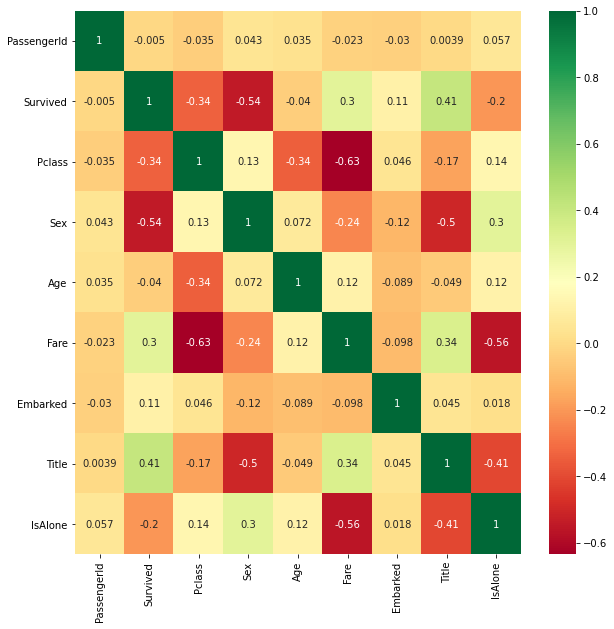

In [ ]:
corrmat = training_set.corr(method = 'pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(training_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_train, Y_train)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Feature Ranking: ",fit.ranking_)
print(X_train.head())

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

83.61


In [ ]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.654343
Pclass,0.200230
Fare,0.054078
Age,0.043752
Embarked,0.024221
IsAlone,0.015898
Sex,0.007478


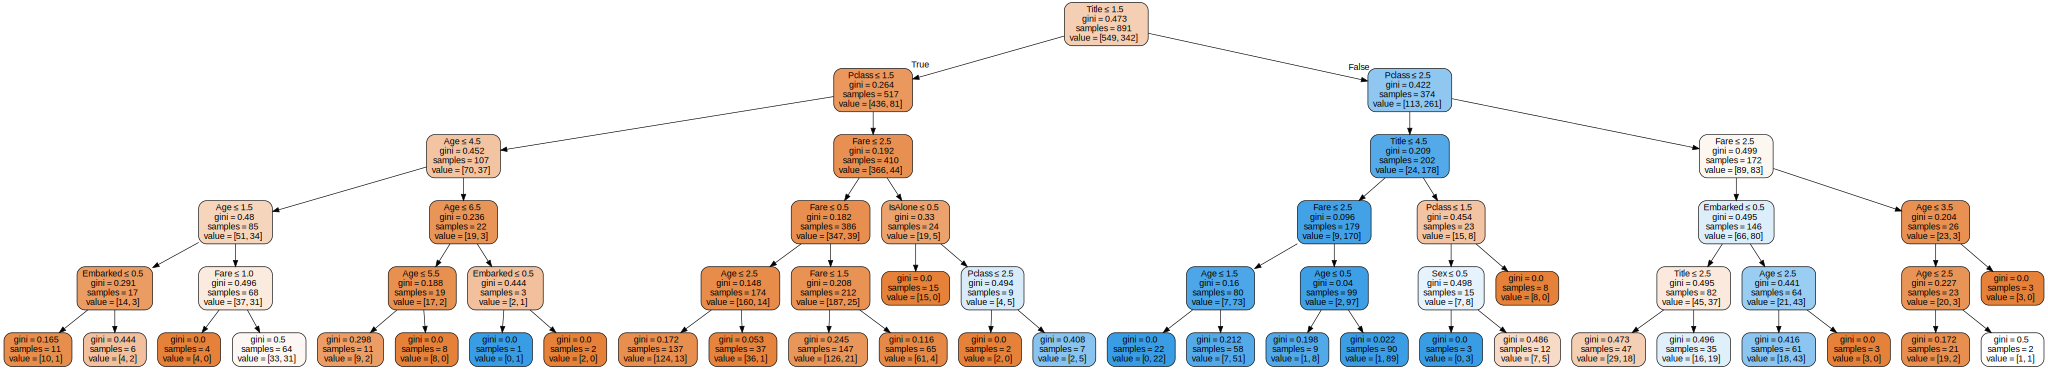

In [ ]:
dot_data = tree.export_graphviz(decision_tree, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = X_train.columns) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
acc_decision_tree_after_5FoldValidation = round(np.mean(cross_val_score(decision_tree, X_train, Y_train,cv=5)) * 100, 2)
acc_decision_tree_after_5FoldValidation

79.24

In [ ]:
np.random.seed(42)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.44

In [ ]:
acc_random_forest_after_5FoldValidation = np.mean(cross_val_score(random_forest, X_train, Y_train, cv=5))
acc_random_forest_after_5FoldValidation = round(acc_random_forest_after_5FoldValidation * 100, 2)
acc_random_forest_after_5FoldValidation

81.26

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest',
              'Decision Tree'],
    'Score': [
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,88.44
1,Decision Tree,83.61
